# IZA discussion paper

## Introduction

In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

The number of papers exploiting machine learning techniques is steadily increasing in economics. The graph below plots the percentage of papers in the IZA discussion paper series and NBER working paper series that mention the bigram `machine learning` in the title, abstract, or paper keywords in the case of IZA discussion papers.

This data can be scraped from the web using the scripts `scrape_IZA_dps.py` and `scrape_NBER_wps.py` in the repository `./notebook` folder.

In [2]:
# Load raw data
iza = pd.read_json(Path('../data/IZA_dps.json'), orient='index')
nber = pd.read_json(Path('../data/NBER_wps.json'), orient='index')

Preprocess data, normalize them by year, plot the graph.

In [45]:
# Compute percentage mentioning `machine learning` by year
izadps = (
    iza[['title', 'keywords', 'abstract']]
    .apply(lambda x: x.str.lower().str.contains('|'.join(['machine learning'])))
    .max(axis=1)
)
izadps.name = 'IZA discussion papers'
nberwps = (
    nber[['title', 'abstract']]
    .apply(lambda x: x.str.lower().str.contains('|'.join(['machine learning'])))
    .max(axis=1)
)
nberwps.name = 'NBER working papers'

toplot = (
    pd.merge(
        izadps.groupby(iza['date'].dt.year).agg('mean'),
        nberwps.groupby(nber['date'].dt.year).agg('mean')
        , left_index=True, right_index=True)
)*100

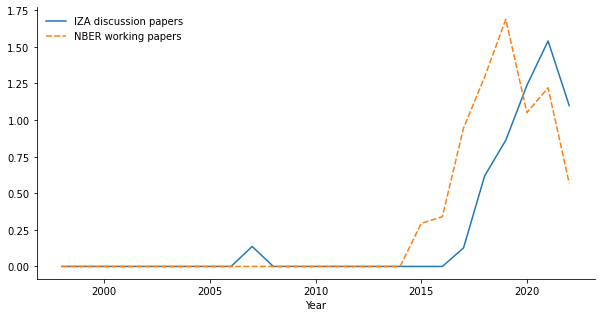

In [46]:
# Plot graph
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.lineplot(data=toplot, ax=ax)
ax.legend(frameon=False)
ax.set_xlabel('Year')
sns.despine()
plt.savefig(Path('../plots') / 'count_ML_papers.pdf', bbox_inches='tight', transparent=True)
plt.savefig(Path('../plots') / 'count_ML_papers.png', bbox_inches='tight', transparent=True)
plt.show()